In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease.csv")
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [4]:
df.shape

(4238, 16)

In [5]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [6]:
# Education is not relate with heart disease prediction
#df.drop('education',axis = 1,inplace = True)

In [7]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [8]:
#To fill the missing binary columns with the mode value
bin_cols = ["Gender","currentSmoker","prevalentStroke","prevalentHyp","diabetes",'education']
#Fill the missing values with the most frequent value
for col in bin_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace = True)

In [9]:
numeric_cols = ['cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val,inplace = True)

In [10]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [11]:
#Tranforming the text into the integer
df['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [12]:
df['Heart_ stroke'].value_counts(normalize=True)

Heart_ stroke
No     0.848042
yes    0.151958
Name: proportion, dtype: float64

In [13]:
df['prevalentStroke'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['prevalentStroke'].value_counts(normalize=True)

prevalentStroke
no     0.994101
yes    0.005899
Name: proportion, dtype: float64

In [15]:
df['Heart_ stroke'] = df['Heart_ stroke'].replace(['No','yes'],[0,1])
df['prevalentStroke'] = df['prevalentStroke'].replace(['no','yes'],[0,1])
df['education'] = df['education'].replace(['uneducated','primaryschool','graduate','postgraduate'],[1,2,3,4])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 529.9+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df['Gender'].value_counts()

Gender
Female    2419
Male      1819
Name: count, dtype: int64

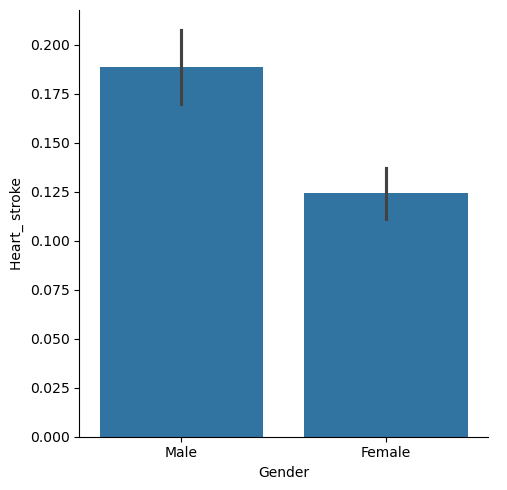

In [20]:
sns.catplot(data = df, y = 'Heart_ stroke',x ='Gender',kind = 'bar')
plt.show()

In [21]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

Gender
0    2419
1    1819
Name: count, dtype: int64

In [22]:
#To check whether the data is balanced or not
df['Heart_ stroke'].value_counts()

Heart_ stroke
0    3594
1     644
Name: count, dtype: int64

# Exploratory data analysis

In [23]:
df['Heart_ stroke'].value_counts(normalize = True)

Heart_ stroke
0    0.848042
1    0.151958
Name: proportion, dtype: float64

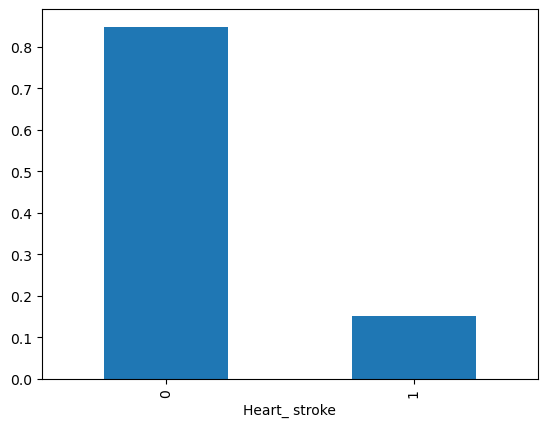

In [24]:
df['Heart_ stroke'].value_counts(normalize = True).plot(kind = 'bar')
plt.show()

In [25]:
df.groupby(['Gender']).mean(numeric_only=True)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
Gender,,,,,,,,,,,,,,,
0,49.800331,1.942952,0.408433,5.684167,0.036792,0.006201,0.308392,0.023563,239.362547,133.040099,82.295163,25.511984,77.094667,81.403886,0.124432
1,49.298516,1.970313,0.608026,13.273227,0.019241,0.005498,0.313359,0.028587,233.134689,131.437878,83.689115,26.183496,74.261682,81.869159,0.188565


In [26]:
df.groupby('Gender')['Heart_ stroke'].mean()

Gender
0    0.124432
1    0.188565
Name: Heart_ stroke, dtype: float64

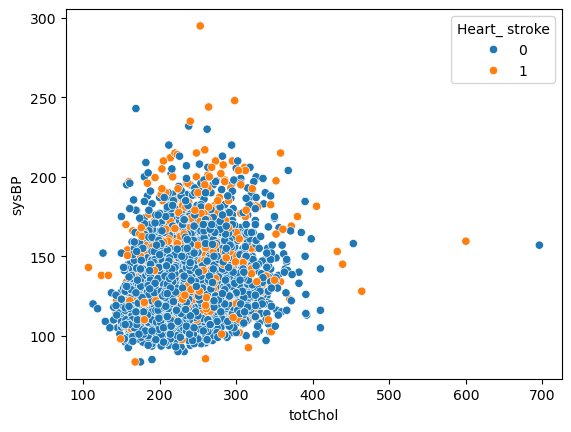

In [27]:
plt.figure(figure = (12,7))
sns.scatterplot(data = df,y = 'sysBP',x = 'totChol',hue = 'Heart_ stroke')
plt.show()

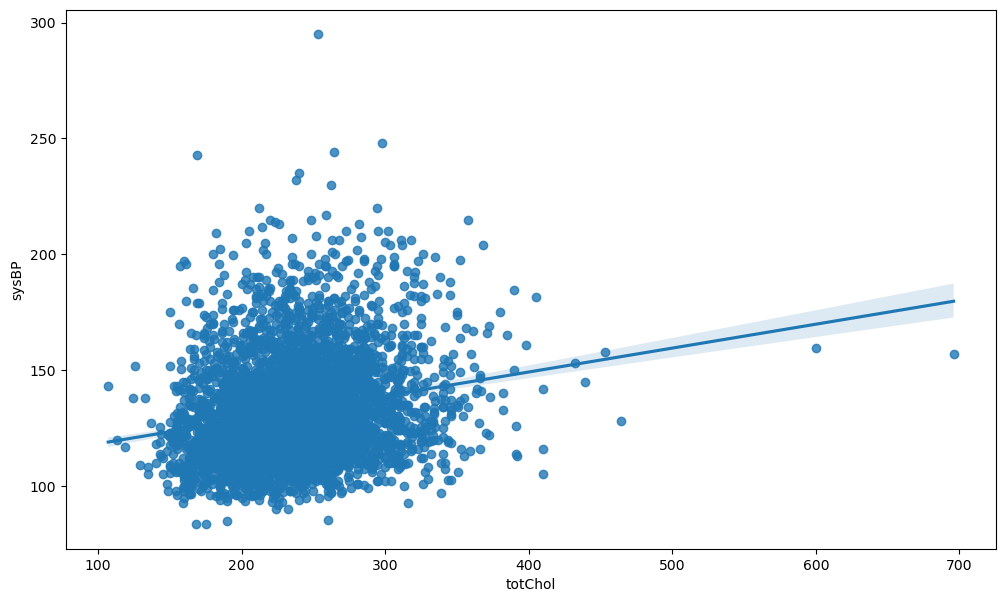

In [28]:
plt.figure(figsize=(12,7))
sns.regplot(data = df,y ='sysBP',x ='totChol')
plt.show()

# Seperating the dummy variables

In [29]:
df_dum = df.select_dtypes(include = ['int'])
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           4238 non-null   int32
 1   age              4238 non-null   int64
 2   education        4238 non-null   int64
 3   currentSmoker    4238 non-null   int64
 4   prevalentStroke  4238 non-null   int64
 5   prevalentHyp     4238 non-null   int64
 6   diabetes         4238 non-null   int64
 7   Heart_ stroke    4238 non-null   int64
dtypes: int32(1), int64(7)
memory usage: 248.4 KB


In [30]:
#categorical variables labeled as float
df.nunique().sort_values()

Gender                2
currentSmoker         2
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
Heart_ stroke         2
education             4
cigsPerDay           33
age                  39
heartRate            73
glucose             143
diaBP               146
sysBP               234
totChol             248
BMI                1363
dtype: int64

In [31]:
#Creating the subset of the categorical variables which are labeled as float
col_int = df.nunique().reset_index()
col_int.columns = ['features','object']
col_int['object'] = col_int['object'].astype('int64')
col_int = col_int.sort_values(by ='object')
col_int = col_int[col_int.object<10]
col_int.features.values

array(['Gender', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'Heart_ stroke', 'education'],
      dtype=object)

In [32]:
df_dum = df[col_int.features.values]
df_dum

,Gender,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,Heart_ stroke,education
0,1,0,0.0,0,0,0,0,4
1,0,0,0.0,0,0,0,0,2
2,1,1,0.0,0,0,0,0,1
3,0,1,0.0,0,1,0,1,3
4,0,1,0.0,0,0,0,0,3
...,...,...,...,...,...,...,...,...
4233,1,1,0.0,0,1,0,1,1
4234,1,1,0.0,0,0,0,0,3
4235,0,1,0.0,0,0,0,0,2
4236,0,1,0.0,0,0,0,0,1


<Axes: xlabel='currentSmoker', ylabel='count'>

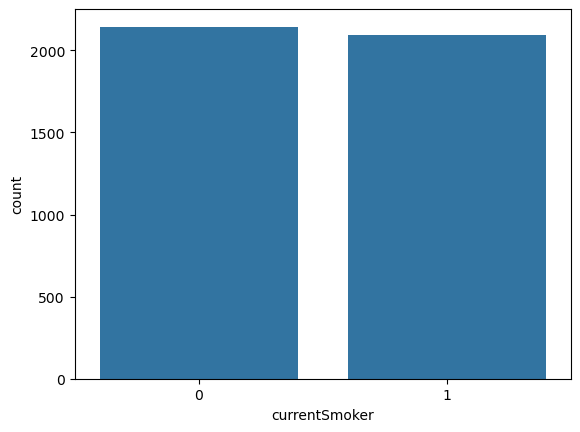

In [33]:
#To analyse the data wrt to cig per day
sns.countplot(data = df_dum,x ='currentSmoker')

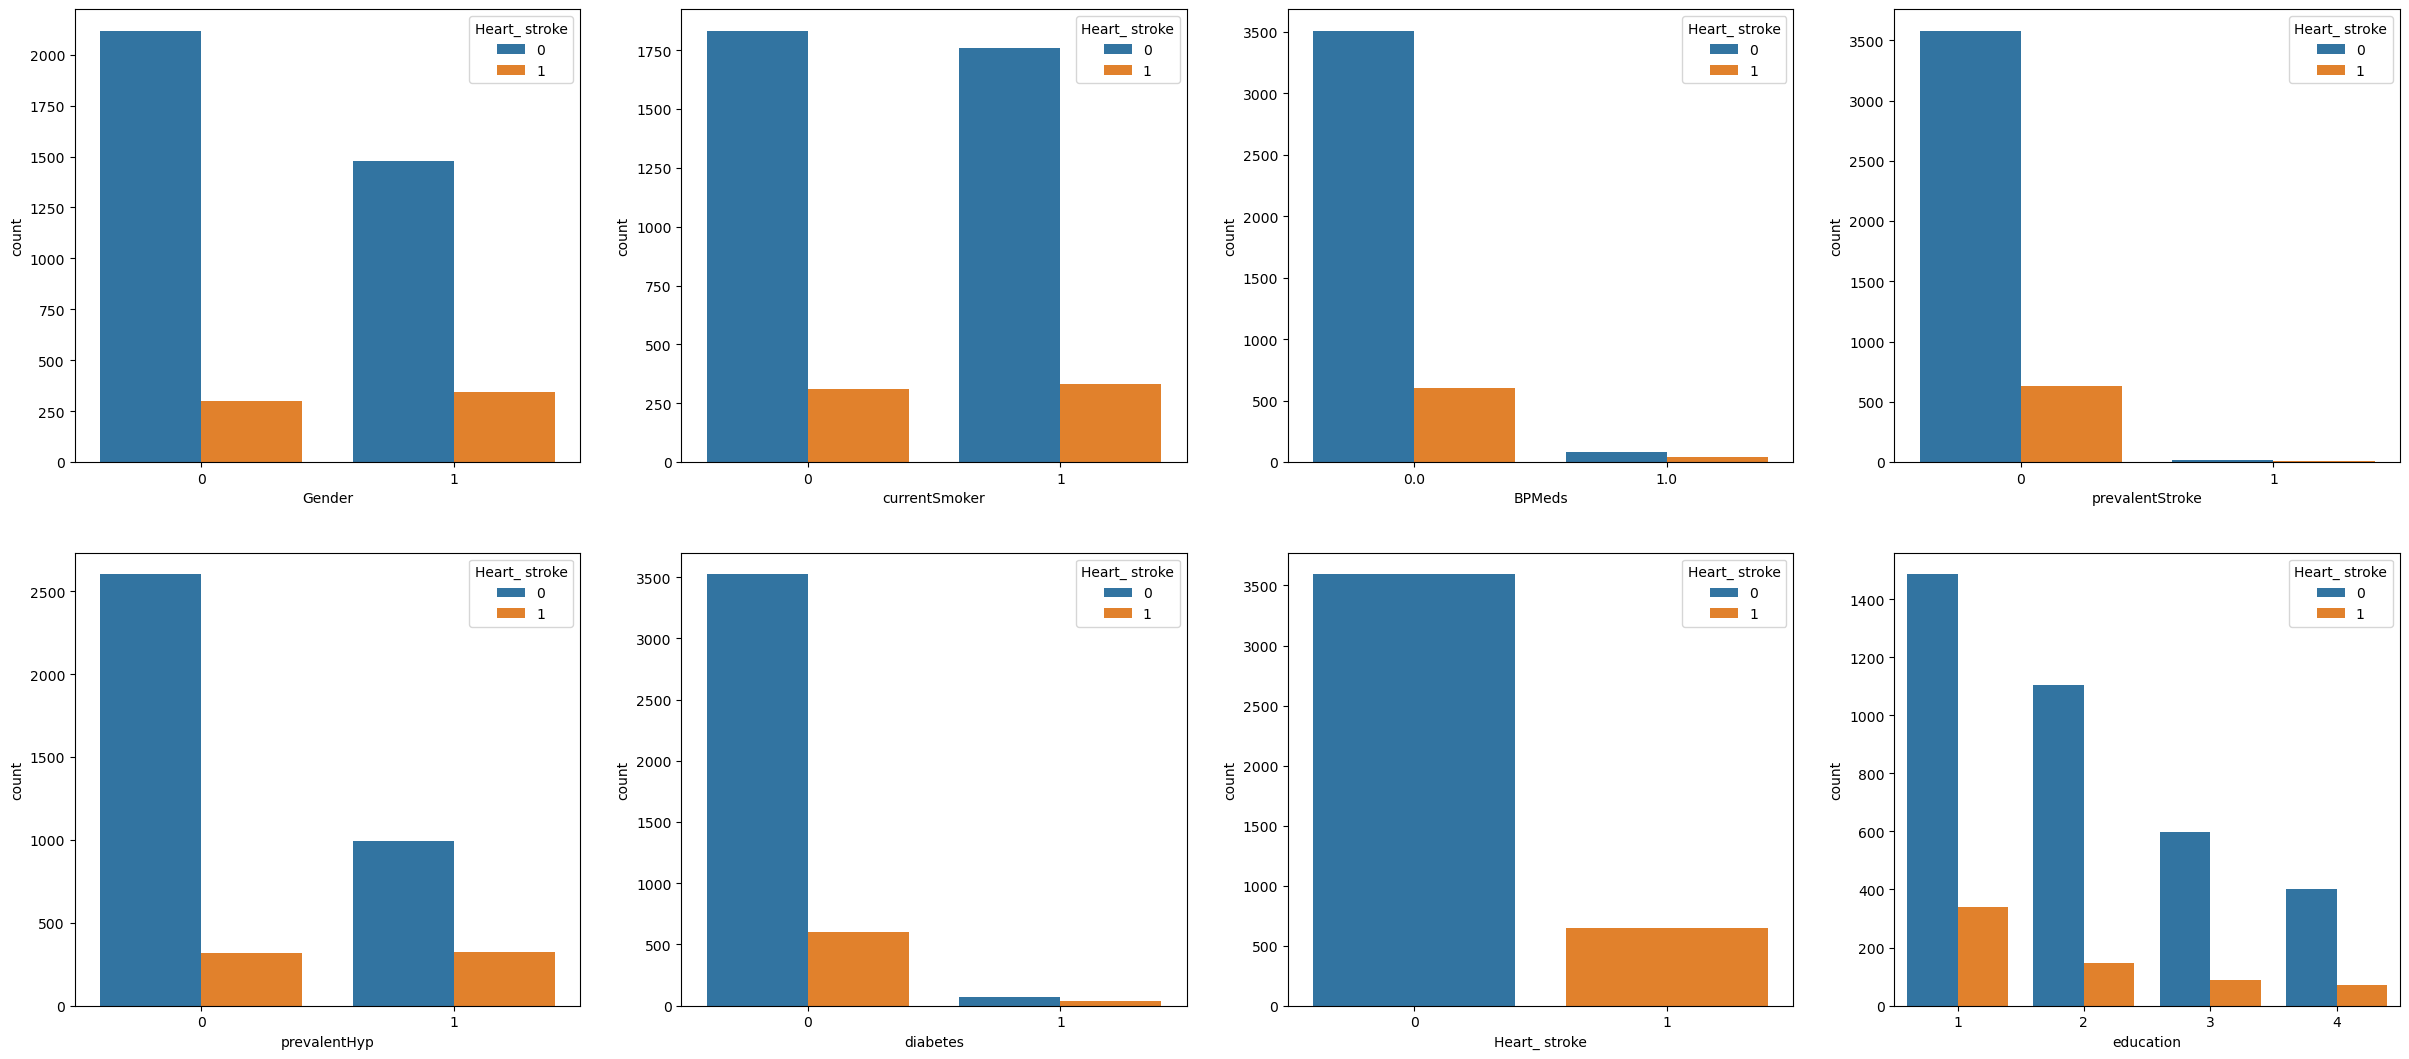

In [34]:
plt.figure(figsize=(30,20))
for i in enumerate(df_dum.columns):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(x = i[1],hue = 'Heart_ stroke',data =df_dum)

# Continuous variable

In [35]:
df_cont = df.select_dtypes(include=['float'])
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cigsPerDay  4238 non-null   float64
 1   BPMeds      4238 non-null   float64
 2   totChol     4238 non-null   float64
 3   sysBP       4238 non-null   float64
 4   diaBP       4238 non-null   float64
 5   BMI         4238 non-null   float64
 6   heartRate   4238 non-null   float64
 7   glucose     4238 non-null   float64
dtypes: float64(8)
memory usage: 265.0 KB


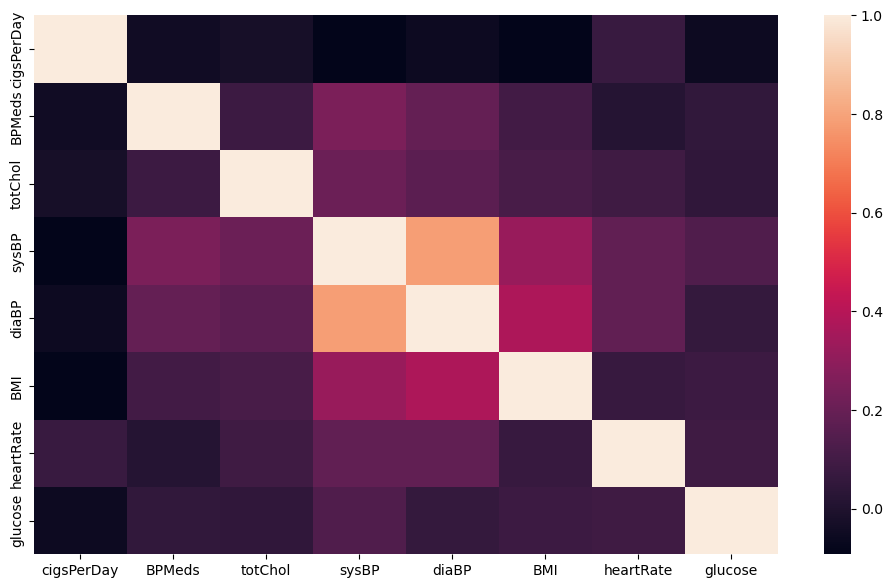

In [36]:
plt.figure(figsize = (12,7))
sns.heatmap(df_cont.corr())
plt.show()

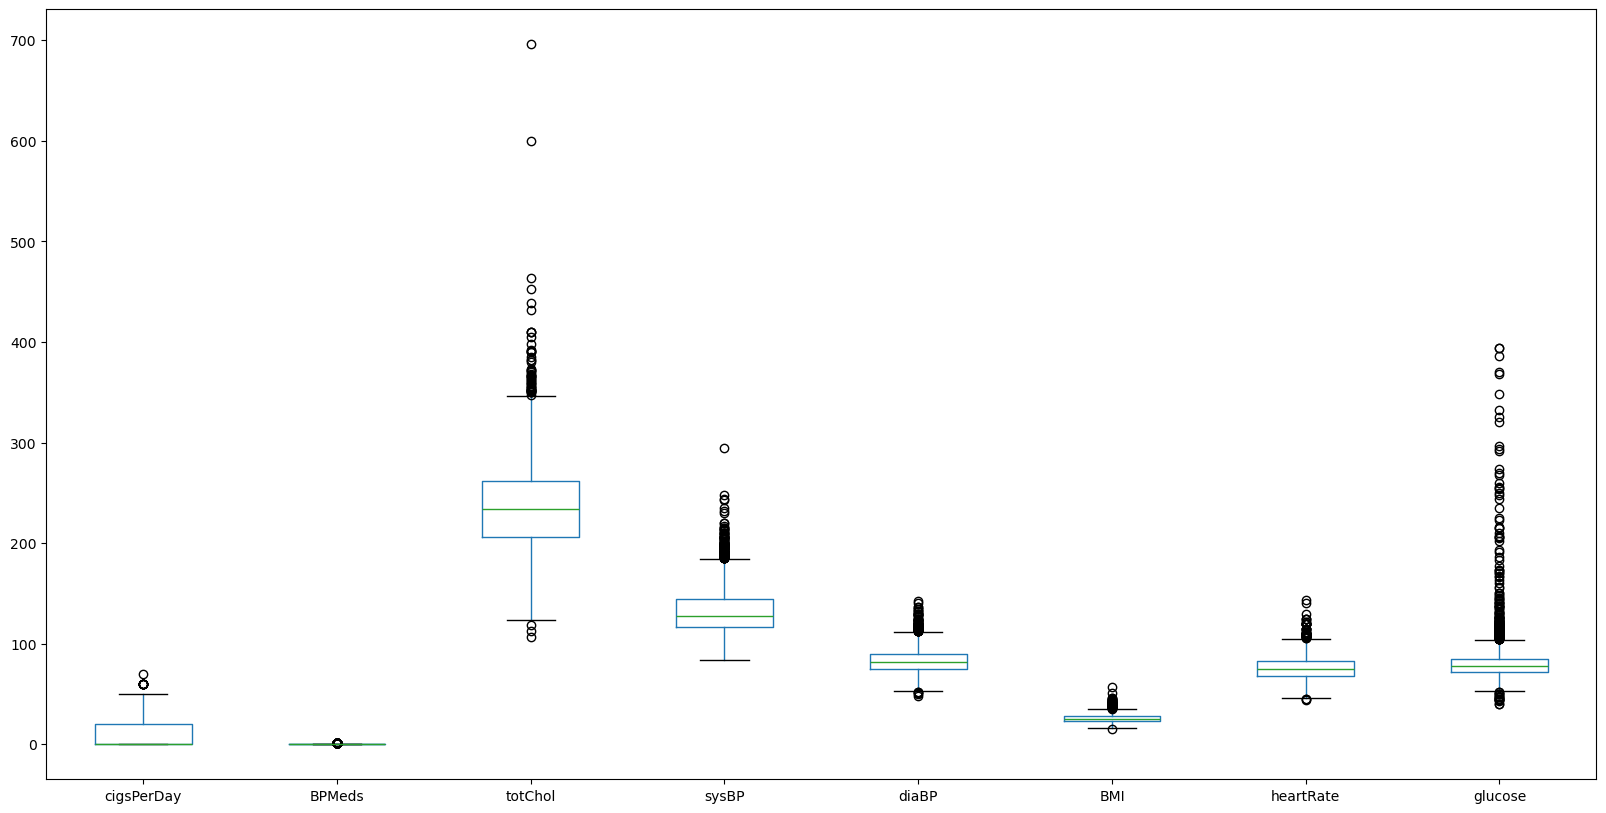

In [37]:
plt.figure(figsize=(20,10))
df_cont.boxplot(grid=False)
plt.show()

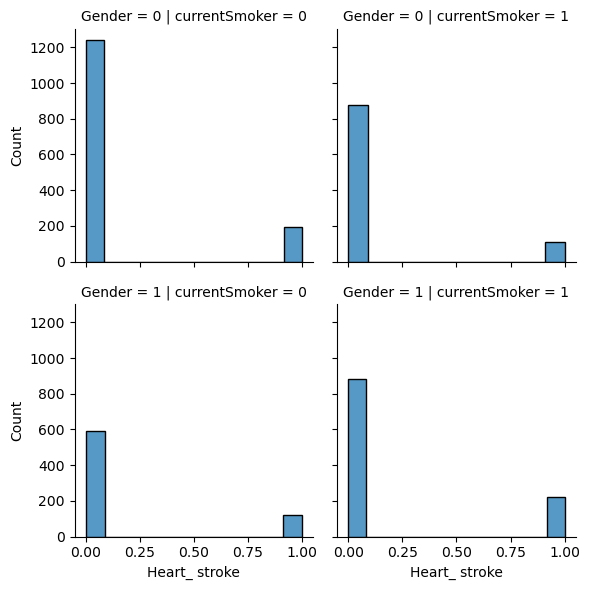

In [38]:
g = sns.FacetGrid(df,row = 'Gender',col = 'currentSmoker')
g.map(sns.histplot,'Heart_ stroke')
plt.show()

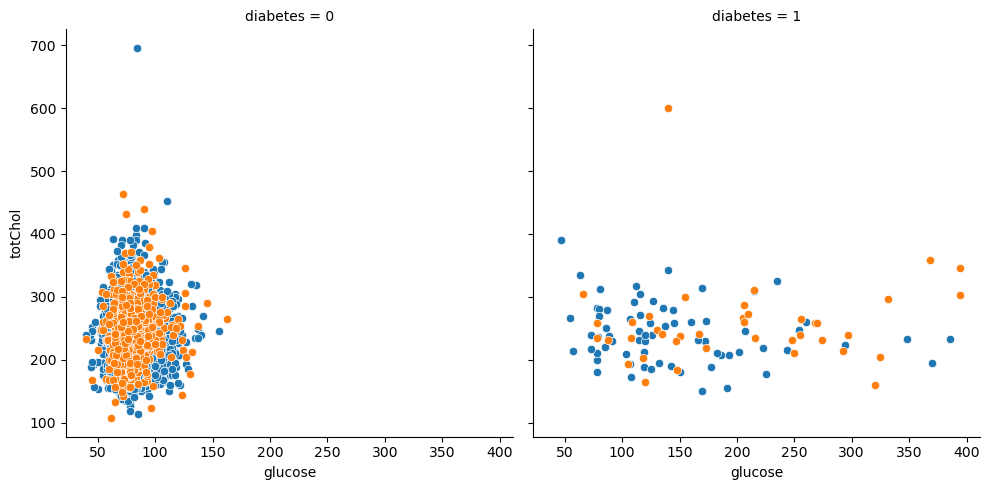

In [39]:
g = sns.FacetGrid(df,hue = 'Heart_ stroke',col='diabetes',height = 5)
g.map(sns.scatterplot,'glucose','totChol')
plt.show()

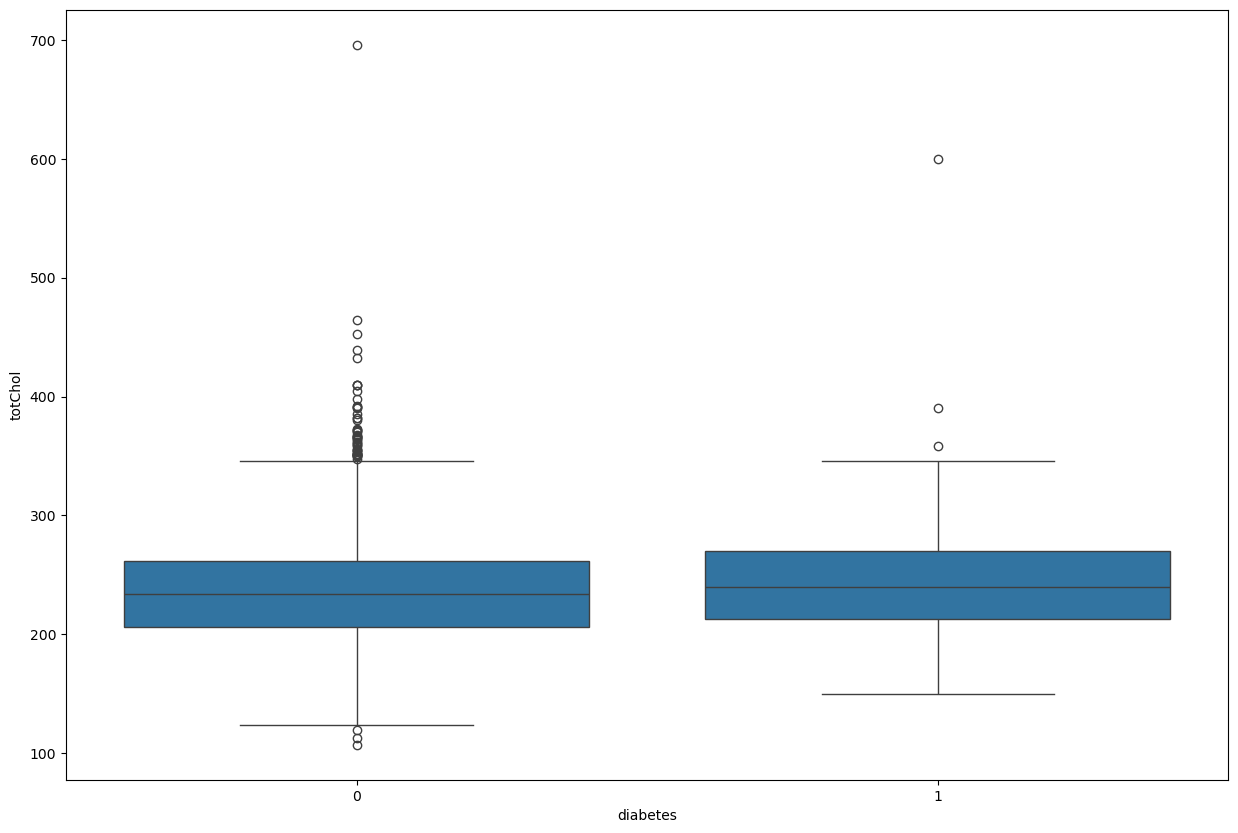

In [40]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = df,x ='diabetes',y = 'totChol',ax=ax)
plt.show()

In [41]:
df_cont

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,20.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0
3,30.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0
4,23.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...
4233,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.0
4234,43.0,0.0,207.0,126.5,80.0,19.71,65.0,68.0
4235,20.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0
4236,15.0,0.0,210.0,126.5,87.0,19.16,86.0,78.0


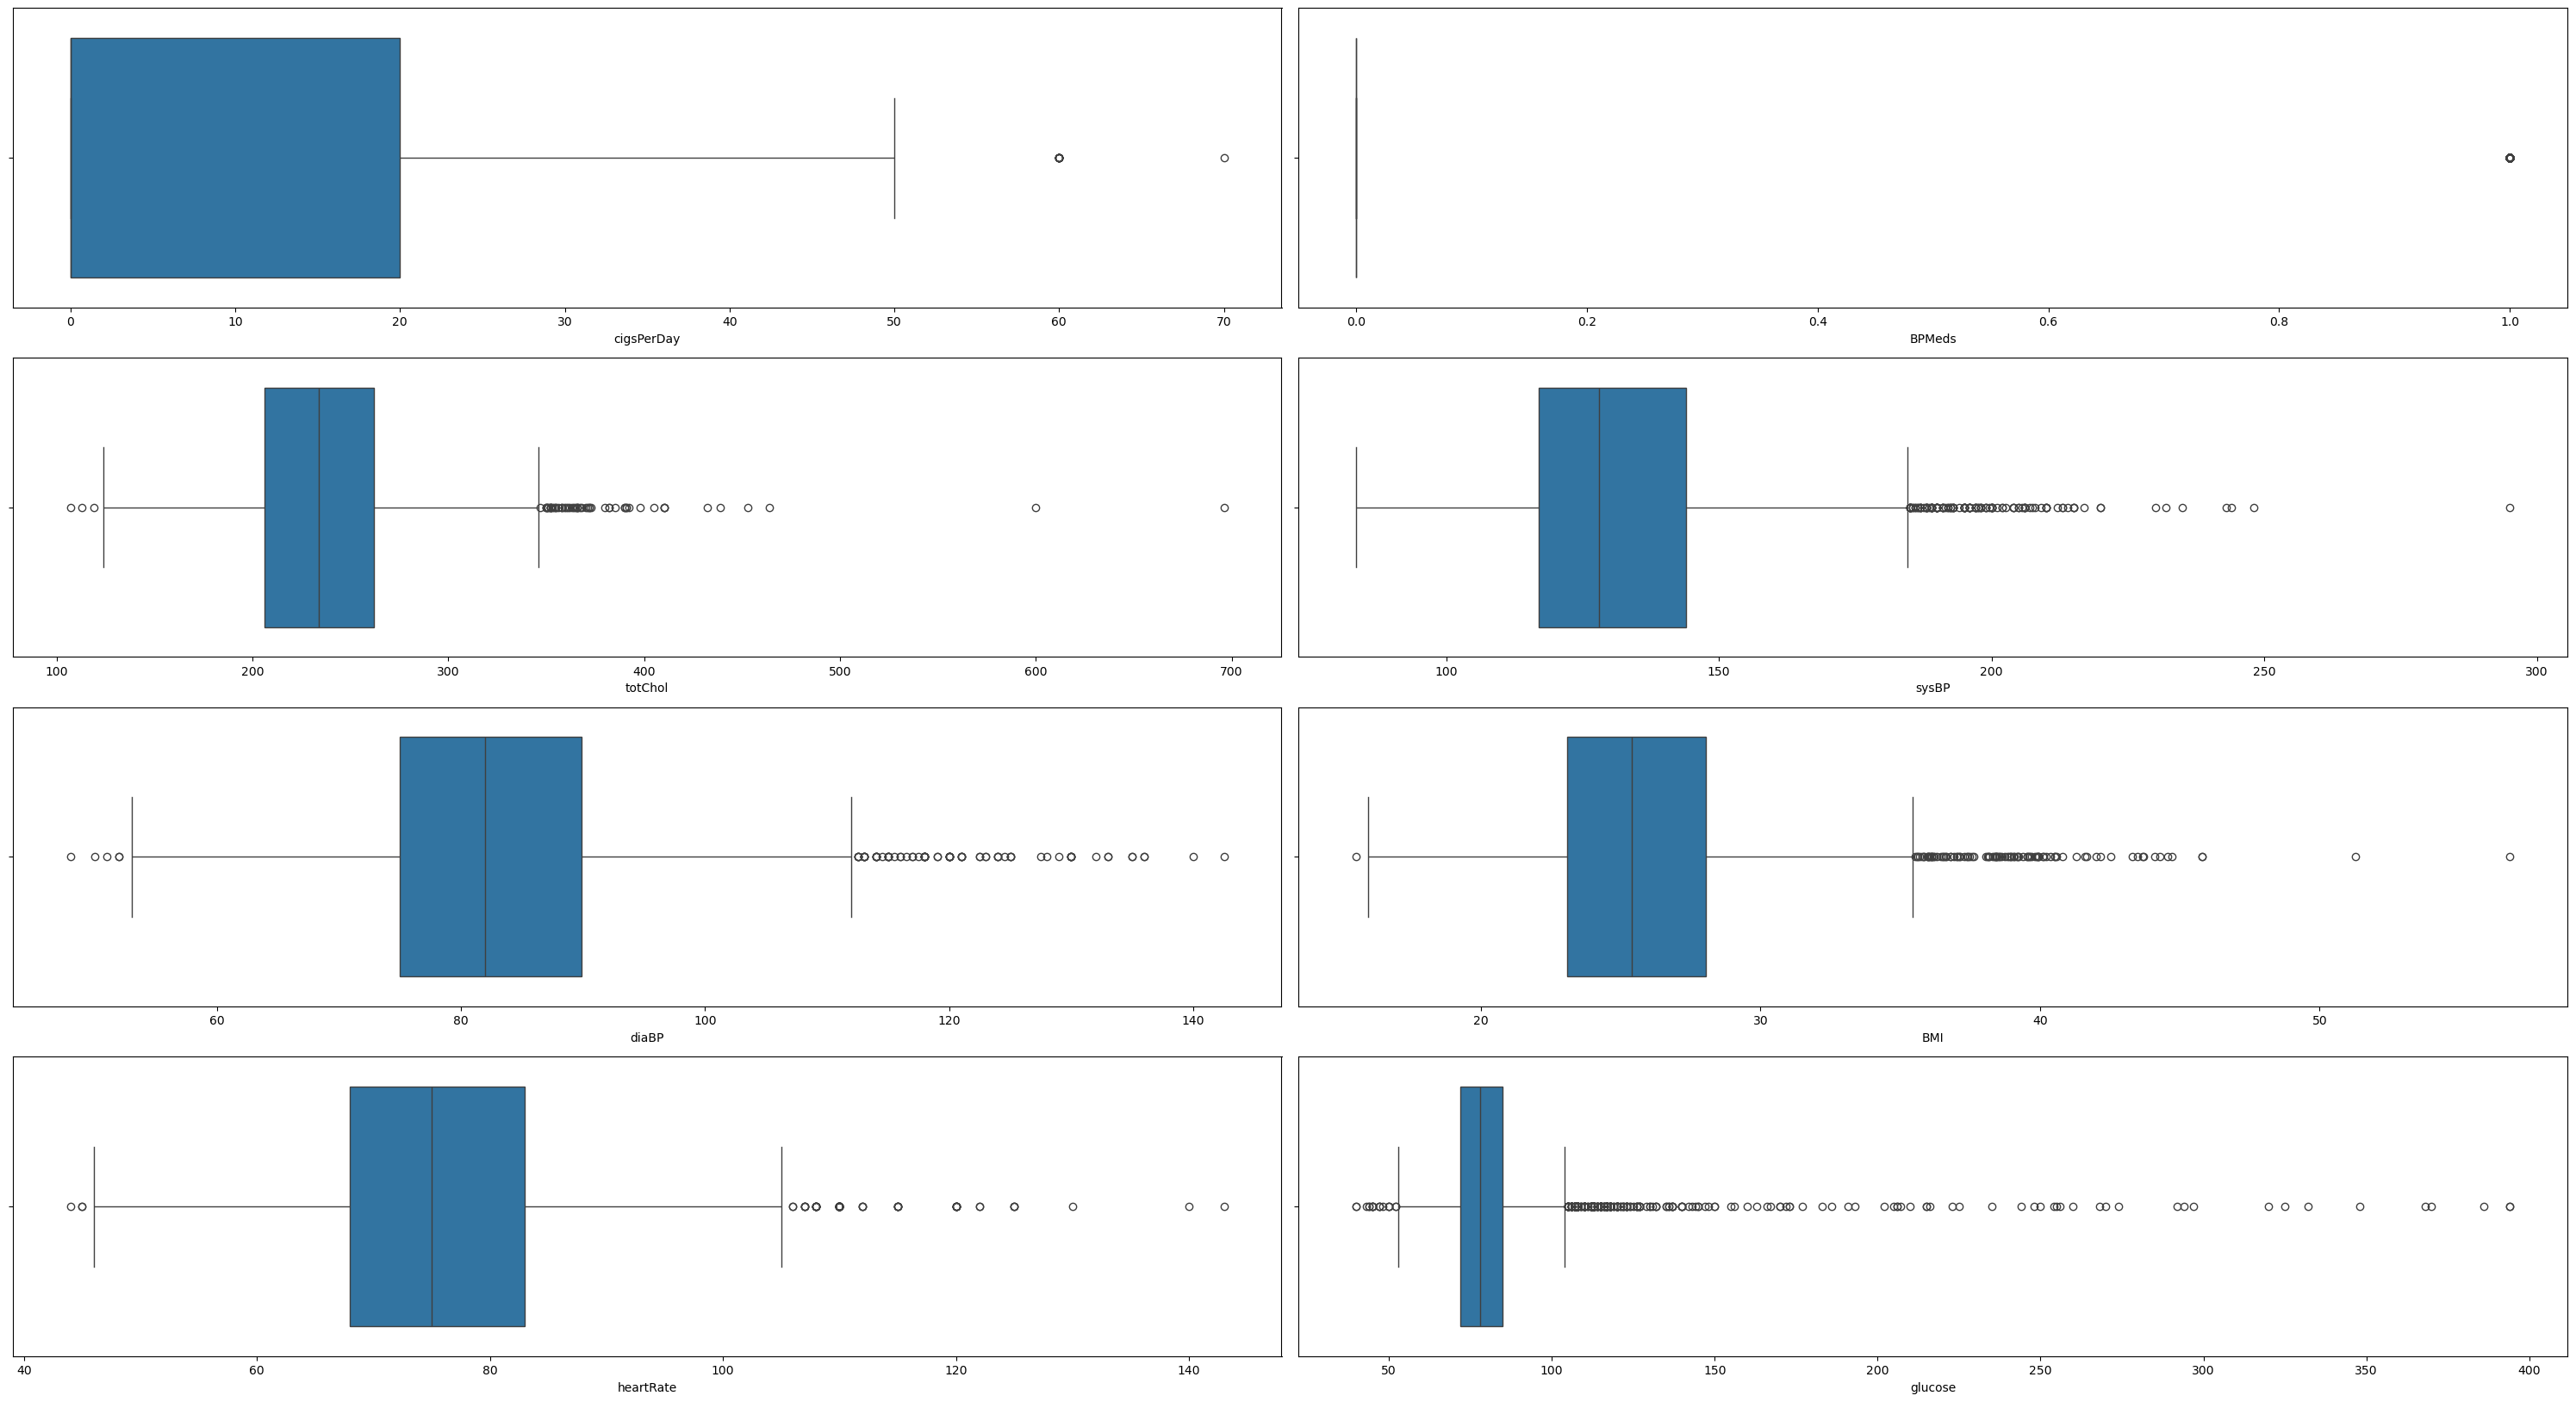

In [42]:
plt.figure(figsize=(30,20))
for i in enumerate(df_cont.columns):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=i[1],data = df_cont)
plt.tight_layout()

# Generating Machine learning model

The imbalance in the target variable

In [43]:
df['Heart_ stroke'].value_counts() 

Heart_ stroke
0    3594
1     644
Name: count, dtype: int64

<Axes: xlabel='Heart_ stroke'>

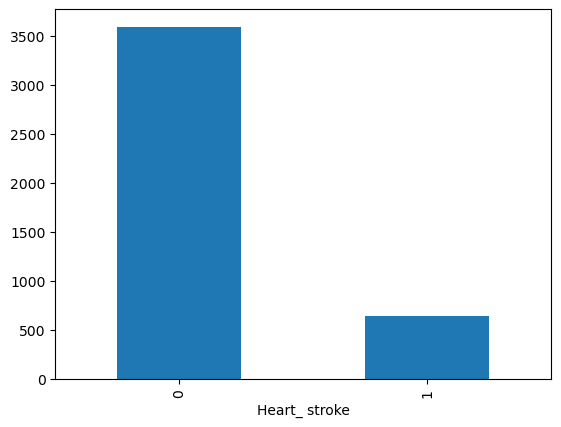

In [44]:
df['Heart_ stroke'].value_counts().plot(kind = 'bar')

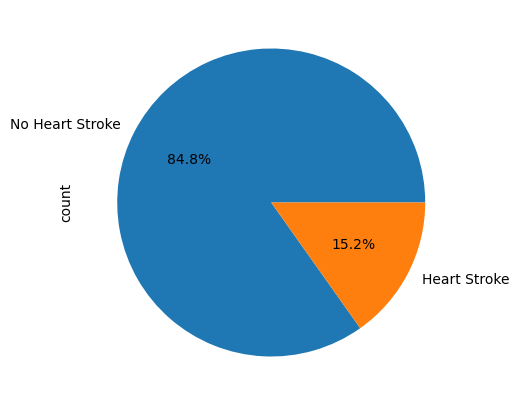

In [45]:
#Visualise the distribution in target variable pie-chart
plt.figure(figsize=(6,5))
df['Heart_ stroke'].value_counts().plot(kind = 'pie',autopct='%1.1f%%',labels = ['No Heart Stroke','Heart Stroke'])
plt.show()

In [46]:
from sklearn.utils import resample
#Seperate majority and minority classes
df_majority = df[df['Heart_ stroke'] == 0]
df_minority = df[df['Heart_ stroke'] == 1]
#Unsample minority classes
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = len(df_majority),
                                random_state = 42)
# Combine majority class with upsamples minority class
df_balanced = pd.concat([df_majority,df_minority_upsampled])

In [47]:
df_balanced['Heart_ stroke'].value_counts()

Heart_ stroke
0    3594
1    3594
Name: count, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   int32  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   int64  
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  Heart_ stroke    4238 non-null   int64  
dtypes: float64(8), int32(1), int64(7)
memory usage: 513.3 KB


<Axes: title={'center': 'Correlation with Heart disease'}>

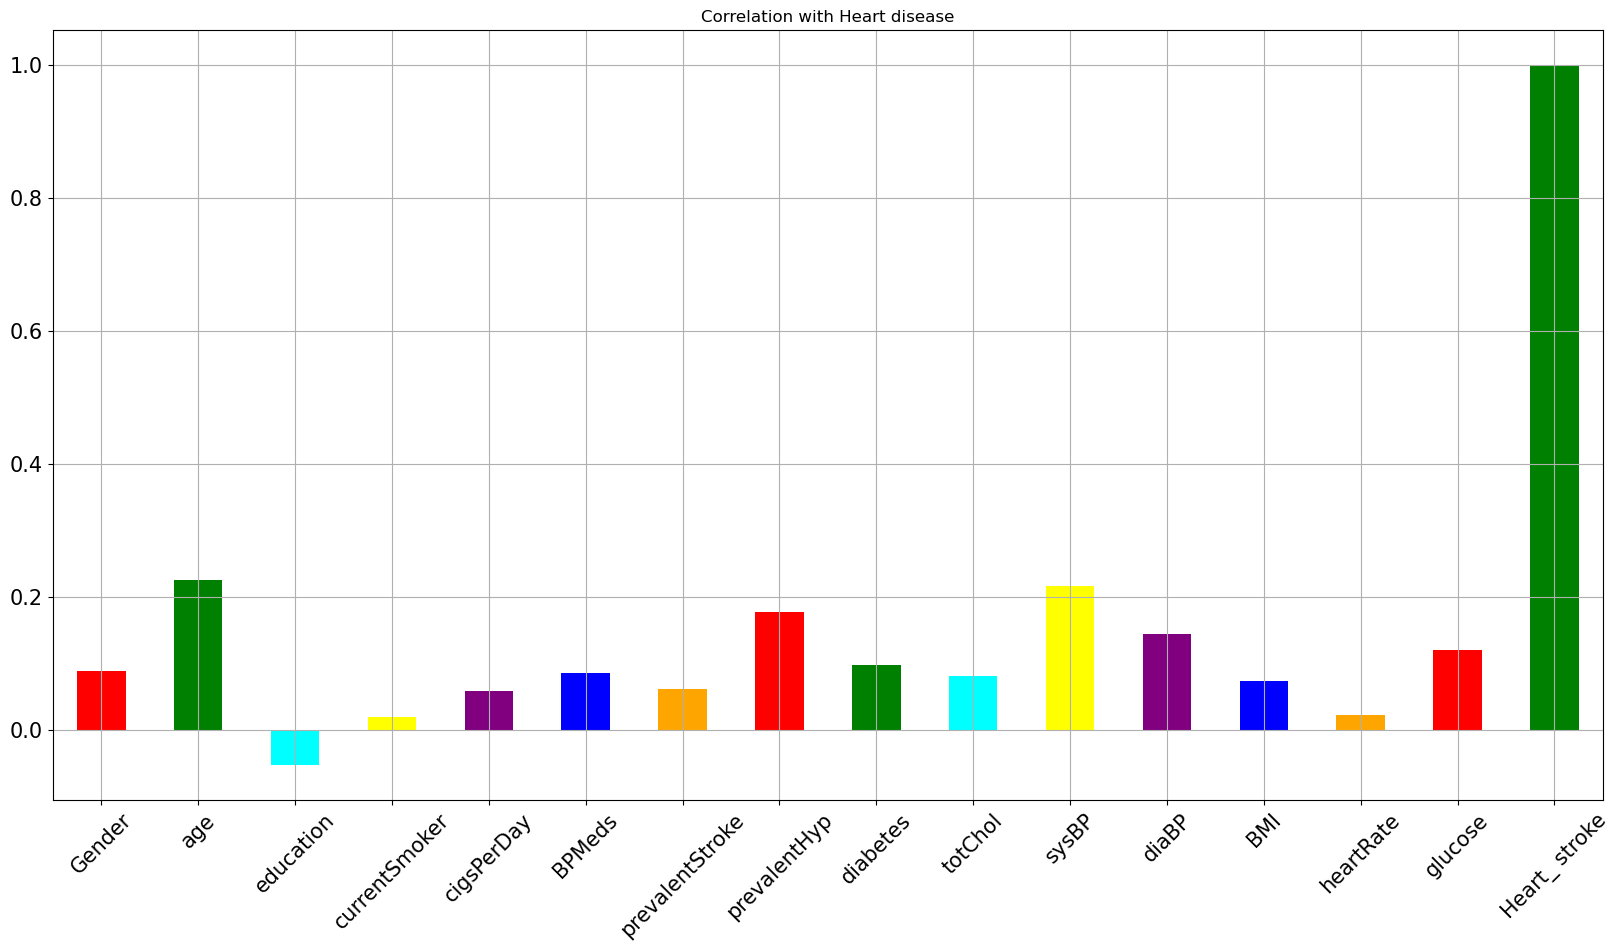

In [49]:
c = ['red', 'green', 'cyan', 'yellow', 'purple', 'blue', 'orange']
df.corrwith(df['Heart_ stroke']).plot.bar(
    figsize=(20, 10),
    title='Correlation with Heart disease',
    fontsize=15,  # corrected from `font_size` to `fontsize`
    rot=45,
    grid=True,
    color=c
)

In [50]:
#To divide the data into training and testing
from sklearn.model_selection import train_test_split
#Seperate the independent variable and the target variable
X = df_balanced.drop(columns = ['Heart_ stroke'])
y = df_balanced['Heart_ stroke']
#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [52]:
X_train_scaled

array([[-0.94515384, -1.08985711,  0.09518649, ..., -1.22457838,
        -0.08725632, -0.15175328],
       [ 1.05802882,  0.30589144, -0.88217478, ...,  0.06756068,
         2.00186699, -0.44172234],
       [-0.94515384, -1.67141901, -0.88217478, ..., -1.05624467,
        -0.08725632,  0.26709092],
       ...,
       [ 1.05802882, -0.97354473,  0.09518649, ..., -0.45640764,
        -1.34073031, -0.44172234],
       [ 1.05802882,  0.65482858, -0.88217478, ..., -0.0367588 ,
        -1.09003551,  0.17043457],
       [ 1.05802882, -0.74091997,  0.09518649, ...,  1.07519205,
         0.33056834,  1.91024895]])

In [53]:
X_test_scaled

array([[-0.95911062,  0.62509278, -0.87407396, ...,  3.01884914,
        -0.85495648, -1.35219041],
       [ 1.0426326 ,  0.96412349,  2.03321599, ...,  0.73377285,
        -0.60946378, -0.83509804],
       [ 1.0426326 , -1.86113242,  1.06411934, ..., -1.20795002,
        -0.28214019, -0.47009166],
       ...,
       [ 1.0426326 ,  1.19014397, -0.87407396, ...,  0.19861508,
         0.1270143 , -0.53092606],
       [-0.95911062, -0.27898911, -0.87407396, ..., -0.19920131,
         1.92729406, -0.31800567],
       [ 1.0426326 , -0.50500958,  2.03321599, ..., -1.65549346,
        -0.69129468, -0.31800567]])

In [54]:
!pip install xgboost

In [55]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [56]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Create a dictionary to store the results
results = {}


# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9631432545201669
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       753
           1       0.95      0.97      0.96       685

    accuracy                           0.96      1438
   macro avg       0.96      0.96      0.96      1438
weighted avg       0.96      0.96      0.96      1438

Confusion Matrix for RandomForestClassifier:
[[718  35]
 [ 18 667]]
AdaBoostClassifier Accuracy: 0.6675938803894298
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       753
           1       0.64      0.71      0.67       685

    accuracy                           0.67      1438
   macro avg       0.67      0.67      0.67      1438
weighted avg       0.67      0.67      0.67      1438

Confusion Matrix for AdaBoostClassifier:
[[477 276]
 [202 483]]
GradientBoostingCl

In [57]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier()
]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    # Example row data to append
    new_row = pd.DataFrame({'Model': [clf_name], 'Accuracy': [accuracy], 'F1-Score': [f1_score], 
                        'Precision': [precision], 'Recall': [recall]})

    # Use pd.concat to add the new row
    results_df = pd.concat([results_df, new_row], ignore_index=True)
    
    # Append results to DataFrame

results_df

,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.957580,0.957601,0.958113,0.957580
1,AdaBoostClassifier,0.667594,0.667523,0.670997,0.667594
2,GradientBoostingClassifier,0.711405,0.711113,0.716551,0.711405
3,LogisticRegression,0.664117,0.664268,0.665962,0.664117
4,SVC,0.700974,0.701132,0.702486,0.700974
5,KNeighborsClassifier,0.777469,0.774228,0.805917,0.777469
6,DecisionTreeClassifier,0.844228,0.844304,0.844776,0.844228
7,GaussianNB,0.605702,0.563903,0.643739,0.605702
8,XGBClassifier,0.790682,0.786685,0.804800,0.790682


# Using Neural Network

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(11,activation ='relu',input_dim=15))
model.add(Dense(1,activation ='sigmoid'))

In [60]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [61]:
history = model.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=500)

Epoch 1/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5107 - loss: 22.4284 - val_accuracy: 0.5243 - val_loss: 2.3786
Epoch 2/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5322 - loss: 2.0221 - val_accuracy: 0.5626 - val_loss: 1.2427
Epoch 3/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 1.1625 - val_accuracy: 0.5570 - val_loss: 1.1311
Epoch 4/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.9248 - val_accuracy: 0.6113 - val_loss: 0.8334
Epoch 5/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6318 - loss: 0.8273 - val_accuracy: 0.6196 - val_loss: 0.7519
Epoch 6/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.7327 - val_accuracy: 0.6231 - val_loss: 0.6943
Epoch 7/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6813 - val_accuracy: 0.6231 - val_loss: 0.6896
Epoch 8/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6299 - loss: 0.6842 - val_acc

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - loss: 0.6752 - val_accuracy: 0.6050 - val_loss: 0.6766
Epoch 52/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6307 - val_accuracy: 0.6224 - val_loss: 0.6451
Epoch 53/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - loss: 0.6527 - val_accuracy: 0.6363 - val_loss: 0.6429
Epoch 54/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6468 - loss: 0.6341 - val_accuracy: 0.6085 - val_loss: 0.6848
Epoch 55/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.6460 - val_accuracy: 0.6113 - val_loss: 0.6550
Epoch 56/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6309 - loss: 0.6594 - val_accuracy: 0.6238 - val_loss: 0.6649
Epoch 57/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.6743 - val_accuracy: 0.6092 - val_loss: 0.6541
Epoch 58/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6469 - loss: 0.6457 - val_accuracy:

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6358 - loss: 0.6584 - val_accuracy: 0.6175 - val_loss: 0.6583
Epoch 102/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6568 - loss: 0.6347 - val_accuracy: 0.4930 - val_loss: 0.9651
Epoch 103/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6123 - loss: 0.6970 - val_accuracy: 0.6453 - val_loss: 0.6280
Epoch 104/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.6365 - val_accuracy: 0.6509 - val_loss: 0.6289
Epoch 105/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.6365 - val_accuracy: 0.6537 - val_loss: 0.6254
Epoch 106/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6495 - loss: 0.6401 - val_accuracy: 0.6029 - val_loss: 0.6829
Epoch 107/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 0.6256 - val_accuracy: 0.6419 - val_loss: 0.6377
Epoch 108/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - loss: 0.6227 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.6175 - val_accuracy: 0.6523 - val_loss: 0.6214
Epoch 151/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - loss: 0.6308 - val_accuracy: 0.6363 - val_loss: 0.6337
Epoch 152/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6430 - loss: 0.6347 - val_accuracy: 0.6530 - val_loss: 0.6242
Epoch 153/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.6131 - val_accuracy: 0.6175 - val_loss: 0.6665
Epoch 154/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.6232 - val_accuracy: 0.6335 - val_loss: 0.6468
Epoch 155/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 0.6330 - val_accuracy: 0.5939 - val_loss: 0.7010
Epoch 156/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 0.6390 - val_accuracy: 0.6384 - val_loss: 0.6424
Epoch 157/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.6353 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6358 - val_accuracy: 0.6523 - val_loss: 0.6201
Epoch 200/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6293 - val_accuracy: 0.6280 - val_loss: 0.6574
Epoch 201/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6643 - loss: 0.6253 - val_accuracy: 0.6599 - val_loss: 0.6193
Epoch 202/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.6220 - val_accuracy: 0.6586 - val_loss: 0.6244
Epoch 203/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6567 - loss: 0.6349 - val_accuracy: 0.6620 - val_loss: 0.6205
Epoch 204/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 0.6301 - val_accuracy: 0.6599 - val_loss: 0.6265
Epoch 205/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6552 - loss: 0.6265 - val_accuracy: 0.6175 - val_loss: 0.6614
Epoch 206/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.6529 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6608 - loss: 0.6283 - val_accuracy: 0.6467 - val_loss: 0.6319
Epoch 249/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.6304 - val_accuracy: 0.6453 - val_loss: 0.6383
Epoch 250/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6409 - loss: 0.6481 - val_accuracy: 0.6287 - val_loss: 0.6528
Epoch 251/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 0.6442 - val_accuracy: 0.6043 - val_loss: 0.7117
Epoch 252/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - loss: 0.6172 - val_accuracy: 0.5925 - val_loss: 0.7358
Epoch 253/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6500 - loss: 0.6359 - val_accuracy: 0.6579 - val_loss: 0.6238
Epoch 254/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6227 - loss: 0.6562 - val_accuracy: 0.6071 - val_loss: 0.6832
Epoch 255/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.6085 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6456 - loss: 0.6387 - val_accuracy: 0.6085 - val_loss: 0.6899
Epoch 298/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.6215 - val_accuracy: 0.6140 - val_loss: 0.6905
Epoch 299/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6602 - loss: 0.6158 - val_accuracy: 0.6655 - val_loss: 0.6168
Epoch 300/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6644 - loss: 0.6167 - val_accuracy: 0.6474 - val_loss: 0.6230
Epoch 301/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6548 - loss: 0.6294 - val_accuracy: 0.6488 - val_loss: 0.6261
Epoch 302/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6579 - loss: 0.6327 - val_accuracy: 0.6231 - val_loss: 0.6696
Epoch 303/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6643 - loss: 0.6278 - val_accuracy: 0.6259 - val_loss: 0.6500
Epoch 304/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6770 - loss: 0.6140 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.6252 - val_accuracy: 0.6474 - val_loss: 0.6242
Epoch 347/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6771 - loss: 0.6097 - val_accuracy: 0.6481 - val_loss: 0.6277
Epoch 348/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.6310 - val_accuracy: 0.6439 - val_loss: 0.6432
Epoch 349/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6351 - loss: 0.6379 - val_accuracy: 0.6690 - val_loss: 0.6165
Epoch 350/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6581 - loss: 0.6304 - val_accuracy: 0.6572 - val_loss: 0.6188
Epoch 351/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - loss: 0.6510 - val_accuracy: 0.6439 - val_loss: 0.6273
Epoch 352/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6552 - loss: 0.6343 - val_accuracy: 0.6634 - val_loss: 0.6162
Epoch 353/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6604 - loss: 0.6216 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6578 - loss: 0.6230 - val_accuracy: 0.6537 - val_loss: 0.6213
Epoch 396/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6528 - loss: 0.6279 - val_accuracy: 0.6662 - val_loss: 0.6140
Epoch 397/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6659 - loss: 0.6156 - val_accuracy: 0.6391 - val_loss: 0.6385
Epoch 398/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.6245 - val_accuracy: 0.6662 - val_loss: 0.6151
Epoch 399/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.6201 - val_accuracy: 0.6537 - val_loss: 0.6167
Epoch 400/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6563 - loss: 0.6185 - val_accuracy: 0.6495 - val_loss: 0.6370
Epoch 401/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.6173 - val_accuracy: 0.6509 - val_loss: 0.6172
Epoch 402/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - loss: 0.6275 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6631 - loss: 0.6198 - val_accuracy: 0.6648 - val_loss: 0.6138
Epoch 445/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6551 - loss: 0.6217 - val_accuracy: 0.6488 - val_loss: 0.6322
Epoch 446/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6620 - loss: 0.6221 - val_accuracy: 0.6467 - val_loss: 0.6253
Epoch 447/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6763 - loss: 0.6102 - val_accuracy: 0.6592 - val_loss: 0.6196
Epoch 448/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6517 - loss: 0.6233 - val_accuracy: 0.6273 - val_loss: 0.6760
Epoch 449/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - loss: 0.6357 - val_accuracy: 0.6433 - val_loss: 0.6382
Epoch 450/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6664 - loss: 0.6123 - val_accuracy: 0.5883 - val_loss: 0.7330
Epoch 451/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6572 - loss: 0.6174 - val_ac

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6463 - loss: 0.6241 - val_accuracy: 0.6586 - val_loss: 0.6177
Epoch 494/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6693 - loss: 0.6131 - val_accuracy: 0.6669 - val_loss: 0.6165
Epoch 495/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.6108 - val_accuracy: 0.6314 - val_loss: 0.6476
Epoch 496/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.6296 - val_accuracy: 0.6683 - val_loss: 0.6134
Epoch 497/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.6298 - val_accuracy: 0.5911 - val_loss: 0.7410
Epoch 498/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6400 - loss: 0.6481 - val_accuracy: 0.6509 - val_loss: 0.6180
Epoch 499/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6605 - loss: 0.6199 - val_accuracy: 0.6558 - val_loss: 0.6195
Epoch 500/500
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6581 - loss: 0.6099 - val_ac

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9617524339360223
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       753
           1       0.94      0.98      0.96       685

    accuracy                           0.96      1438
   macro avg       0.96      0.96      0.96      1438
weighted avg       0.96      0.96      0.96      1438

Confusion Matrix for Random Forest Classifier:
[[714  39]
 [ 16 669]]


In [63]:
print("Predicted class ",rf_classifier.predict(X_test_scaled[10].reshape(1,-1))[0])
print("Actual_class",y_test.iloc[10])

Predicted class  0
Actual_class 0


In [64]:
print("Predicted class ",rf_classifier.predict(X_test_scaled[200].reshape(1,-1))[0])
print("Actual_class",y_test.iloc[200])

Predicted class  1
Actual_class 1


In [65]:
import pickle
pickle.dump(rf_classifier,open("rf_classifier.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))